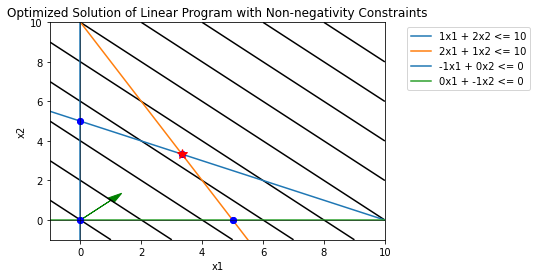

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def intersection(a1, b1, a2, b2):
    """
    Computes the intersection point of two lines given by:
    a1[0]*x + a1[1]*y = b1 and a2[0]*x + a2[1]*y = b2.
    
    Returns the intersection point (x, y) or None if the lines are parallel.
    """
    A = np.array([[a1[0], a1[1]], [a2[0], a2[1]]])
    b = np.array([b1, b2])
    
    # Check if the determinant is non-zero (lines are not parallel)
    if np.linalg.det(A) != 0:
        return tuple(np.linalg.solve(A, b))
    else:
        return None
    
def is_feasible(point, inequalities):
    """
    Checks if a point is feasible given a list of inequalities.
    
    Returns True if the point satisfies all inequalities, otherwise returns False.
    """
    for a, b in inequalities:
        if a[0]*point[0] + a[1]*point[1] > b:
            return False
    # Check non-negativity constraints
    if point[0] < 0 or point[1] < 0:
        return False
    return True



def plot_optimized_linear_program(inequalities, objective):
    """
    Plots the linear program given a list of inequalities and an objective direction, highlighting the optimal solution.
    """
    
    # Add non-negativity constraints to the inequalities list
    inequalities = inequalities + [([-1, 0], 0), ([0, -1], 0)]
    
    # Set the limits of the plot
    xlim = (-1, 10)
    ylim = (-1, 10)
    
    x = np.linspace(xlim[0], xlim[1], 400)
    y = np.linspace(ylim[0], ylim[1], 400)
    X, Y = np.meshgrid(x, y)
    
    feasible_points = []
    
    # Compute intersection points and check their feasibility
    for i, (a1, b1) in enumerate(inequalities):
        for j, (a2, b2) in enumerate(inequalities):
            if i != j:
                point = intersection(a1, b1, a2, b2)
                if point and is_feasible(point, inequalities):
                    feasible_points.append(point)
    
    # Determine the point that maximizes c*x
    max_value = float('-inf')
    max_point = None
    for point in feasible_points:
        value = objective[0]*point[0] + objective[1]*point[1]
        if value > max_value:
            max_value = value
            max_point = point
    
    # Plot the inequalities
    for index, (a, b) in enumerate(inequalities):
        label = f"{a[0]}x1 + {a[1]}x2 <= {b}"
        if a[1] == 0:
            plt.axvline(x=b/a[0], label=label)
        else:
            plt.plot(x, (b - a[0]*x)/a[1], label=label)
    
    # Plot contours of the objective function
    Z = objective[0]*X + objective[1]*Y
    plt.contour(X, Y, Z, 10, colors='black')
    
    # Plot dots at each vertex
    for point in feasible_points:
        plt.plot(point[0], point[1], 'o', color='blue')
    
    # Plot a star at the vertex that maximizes c*x
    if max_point:
        plt.plot(max_point[0], max_point[1], '*', color='red', markersize=10)
    
    # Plot a vector in the direction of c
    plt.arrow(0, 0, objective[0], objective[1], head_width=0.3, head_length=0.5, fc='green', ec='green')
    
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Optimized Solution of Linear Program with Non-negativity Constraints')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

inequalities = [([1, 2], 10), ([2, 1], 10)]   
objective = [1,1]

plot_optimized_linear_program(inequalities, objective)


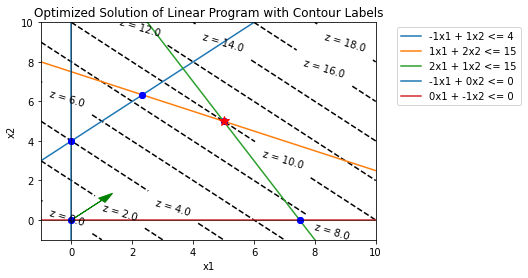

In [19]:
# Re-defining the main plotting function and then re-plotting the optimized linear program with contour labels

def plot_optimized_linear_program_with_contour_labels(inequalities, objective):
    """
    Plots the linear program given a list of inequalities and an objective direction, highlighting the optimal solution.
    Adds labels to the contours.
    """
    
    # Add non-negativity constraints to the inequalities list
    inequalities = inequalities + [([-1, 0], 0), ([0, -1], 0)]
    
    # Set the limits of the plot
    xlim = (-1, 10)
    ylim = (-1, 10)
    
    x = np.linspace(xlim[0], xlim[1], 400)
    y = np.linspace(ylim[0], ylim[1], 400)
    X, Y = np.meshgrid(x, y)
    
    feasible_points = []
    
    # Compute intersection points and check their feasibility
    for i, (a1, b1) in enumerate(inequalities):
        for j, (a2, b2) in enumerate(inequalities):
            if i != j:
                point = intersection(a1, b1, a2, b2)
                if point and is_feasible(point, inequalities):
                    feasible_points.append(point)
    
    # Determine the point that maximizes c*x
    max_value = float('-inf')
    max_point = None
    for point in feasible_points:
        value = objective[0]*point[0] + objective[1]*point[1]
        if value > max_value:
            max_value = value
            max_point = point
    
    # Plot the inequalities
    for index, (a, b) in enumerate(inequalities):
        label = f"{a[0]}x1 + {a[1]}x2 <= {b}"
        if a[1] == 0:
            plt.axvline(x=b/a[0], label=label)
        else:
            plt.plot(x, (b - a[0]*x)/a[1], label=label)
    
    # Plot contours of the objective function and add labels
    Z = objective[0]*X + objective[1]*Y
    CS = plt.contour(X, Y, Z, 10, colors='black', linestyles='dashed')
    plt.clabel(CS, inline=2, fontsize=10, fmt="z = %.1f")
    
    # Plot dots at each vertex
    for point in feasible_points:
        plt.plot(point[0], point[1], 'o', color='blue')
    
    # Plot a star at the vertex that maximizes c*x
    if max_point:
        plt.plot(max_point[0], max_point[1], '*', color='red', markersize=10)
    
    # Plot a vector in the direction of c
    plt.arrow(0, 0, objective[0], objective[1], head_width=0.3, head_length=0.5, fc='green', ec='green')
    
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Optimized Solution of Linear Program with Contour Labels')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

inequalities = [([-1,1],4), ([1, 2], 15), ([2, 1], 15)]   
objective = [1,1]

# Re-plotting the optimized linear program with contour labels
plot_optimized_linear_program_with_contour_labels(inequalities, objective)


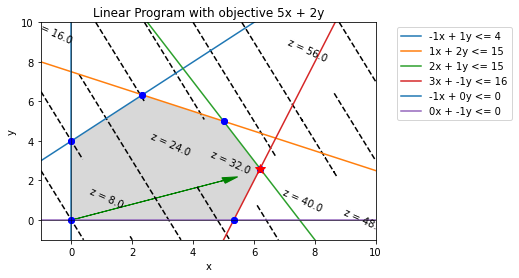

In [42]:
from scipy.spatial import ConvexHull

def plot_with_shaded_convex_hull(inequalities, objective):
    """
    Plots the linear program with a shaded region defined by the convex hull of the feasible intersection points.
    """
    
    # Add non-negativity constraints to the inequalities list
    inequalities = inequalities + [([-1, 0], 0), ([0, -1], 0)]
    
    # Set the limits of the plot
    xlim = (-1, 10)
    ylim = (-1, 10)
    
    x = np.linspace(xlim[0], xlim[1], 400)
    y = np.linspace(ylim[0], ylim[1], 400)
    X, Y = np.meshgrid(x, y)
    
    feasible_points = []
    
    # Compute intersection points and check their feasibility
    for i, (a1, b1) in enumerate(inequalities):
        for j, (a2, b2) in enumerate(inequalities):
            if i != j:
                point = intersection(a1, b1, a2, b2)
                if point and is_feasible(point, inequalities):
                    feasible_points.append(point)
    
    # Compute the convex hull of the feasible points
    if feasible_points:
        hull = ConvexHull(feasible_points)
        plt.fill(hull.points[hull.vertices,0], hull.points[hull.vertices,1], 'grey', alpha=0.3)
    
    # Plot the inequalities
    for index, (a, b) in enumerate(inequalities):
        label = f"{a[0]}x + {a[1]}y <= {b}"
        if a[1] == 0:
            plt.axvline(x=b/a[0], label=label)
        else:
            plt.plot(x, (b - a[0]*x)/a[1], label=label)
    
    # Plot contours of the objective function and add labels
    Z = objective[0]*X + objective[1]*Y
    CS = plt.contour(X, Y, Z, 10, colors='black', linestyles='dashed')
    plt.clabel(CS, inline=1, fontsize=10, fmt="z = %.1f")
    
    # Plot dots at each vertex
    for point in feasible_points:
        plt.plot(point[0], point[1], 'o', color='blue')
    
    # Plot a star at the vertex that maximizes c*x
    max_value = float('-inf')
    max_point = None
    for point in feasible_points:
        value = objective[0]*point[0] + objective[1]*point[1]
        if value > max_value:
            max_value = value
            max_point = point
    if max_point:
        plt.plot(max_point[0], max_point[1], '*', color='red', markersize=10)
    
    # Plot a vector in the direction of c
    plt.arrow(0, 0, objective[0], objective[1], head_width=0.3, head_length=0.5, fc='green', ec='green')
    
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Linear Program with objective {objective[0]}x + {objective[1]}y')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    
inequalities = [([-1,1],4), ([1, 2], 15), ([2, 1], 15), ([3,-1], 16)]   
objective = [5,2]

# Plotting the linear program with the shaded convex hull
plot_with_shaded_convex_hull(inequalities, objective)
